#문제1

답 → 3번 : 엔트로피 불순도 또한 낮을수록 분류하기 쉽다. 

5번 : 특성 중요도가 낮다는 것의 의미는 낮은 층에 해당하는, 세세하게 클래스를 분류하는 노도의 테스트이거나 혹은 테스트에 사용되지 않는 특성이라는 의미이므로 특성 중요도가 낮다고 해서 그 특성이 유용하지 않는다는 뜻은 아니다.

#문제2

답 → 1번 : 데이터의 개수만큼 복원 추출한다는 것이 표본집단과 모집단의 개수간의 관계를 설명한다고 보기는 어렵다.

→ 3번 : 엑스트라 트리의 경우, 랜덤 포레스트보다 무작위성이 좀 더 크기에 더 많은 결정 트리를 훈련해야 한다. 하지만 노드를 랜덤하게 분할하기 때문에 오히려 랜덤 포레스트보다 계산 속도가 더 빠르다.

→ 4번 : 랜덤 포레스트의 각 트리가 과적합될 수는 있으나, 각 트리 중 과적합 된 특성들을 피하고자 랜덤하게, 여러개의 트리를 만드는 것이므로 각 트리의 연관성이 낮을수록 성능이 높아진다고 볼 수 있다.

#문제3

In [17]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()
#data split
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)
#preprocessing
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
#LR
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print('GridSearch 사용 전')
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
#GridSearch 시작
from sklearn.model_selection import GridSearchCV
params = {'C' : range(1, 101)}

gs = GridSearchCV(LogisticRegression(max_iter = 1000), params, n_jobs = -1)

gs.fit(train_scaled, train_target)

print('GridSearch 사용 후')
print(gs.score(train_scaled, train_target))
print(gs.score(test_scaled, test_target))

print('GridSearch에서 찾아낸 최적의 C값')
print(gs.best_params_)

#찾은 값을 토대로 직접 LR 모델에  적용해보기
lr = LogisticRegression(C = 97, max_iter = 1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

GridSearch 사용 전
0.9327731092436975
0.925


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,


GridSearch 사용 후
0.9831932773109243
0.925
GridSearch에서 찾아낸 최적의 C값
{'C': 97}
0.9831932773109243
0.925


#문제4

정답 → 2번 : 하나의 하이퍼파라미터의 최적값을 찾았다고 해서 그 값을 고정시키고 나머지 하이퍼파라미터의 최적값을 찾으면 오히려 정확도가 떨어진다. 즉, 각각의 하이퍼파라미터는 종속적이라고 볼 수 있다.

→ 3번 : LOOCV 방법은 대체적으로 시간이 오래 걸린다. 하지만 

$CV(n)=1n∑i=1n(yi−y^i1−hi)2$ 공식이 적용된 LR과 PR에서는 computing time을 획기적으로 줄일 수 있다.

→  6번 : LOOCV는 모든 특성이 포함된 데이터 샘플을 가지고 데이터의 개수 만큼 모델을 훈련시키는 방법이므로 과적합이 될 확률이 높으며 이는 곧 variance가 높다는 것을 의미한다.

#5번

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


0.9975845410628019
0.9323671497584541


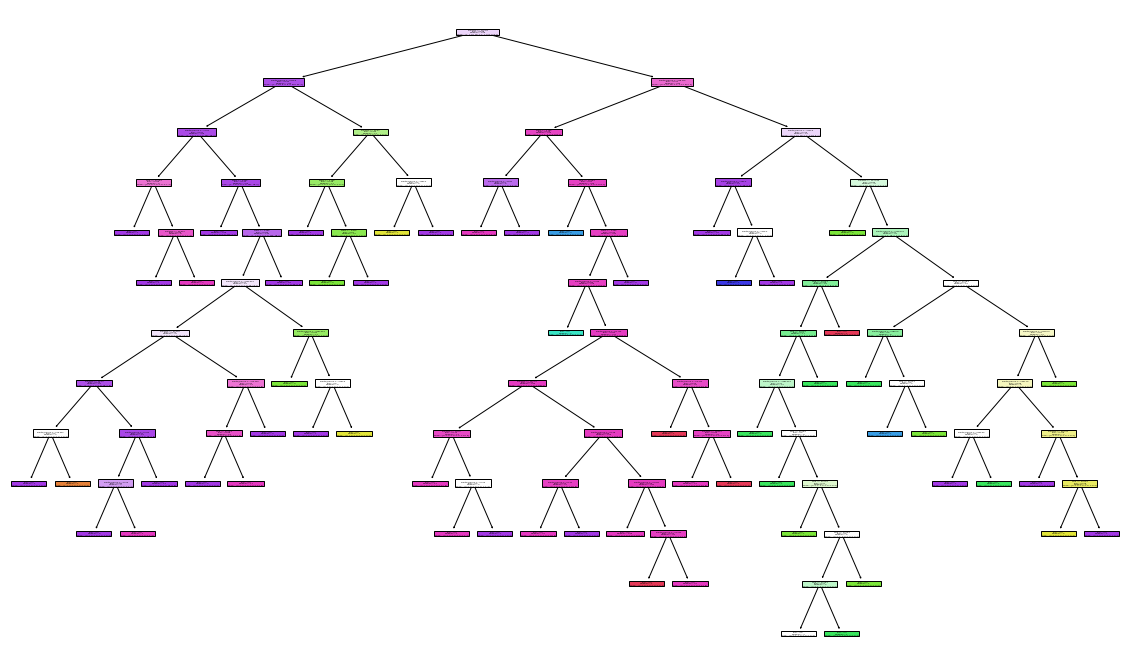

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


{'max_depth': 16, 'min_impurity_decrease': 0.0008209399242521293, 'min_samples_leaf': 1, 'min_samples_split': 17}
0.961352657004831
0.9420289855072463


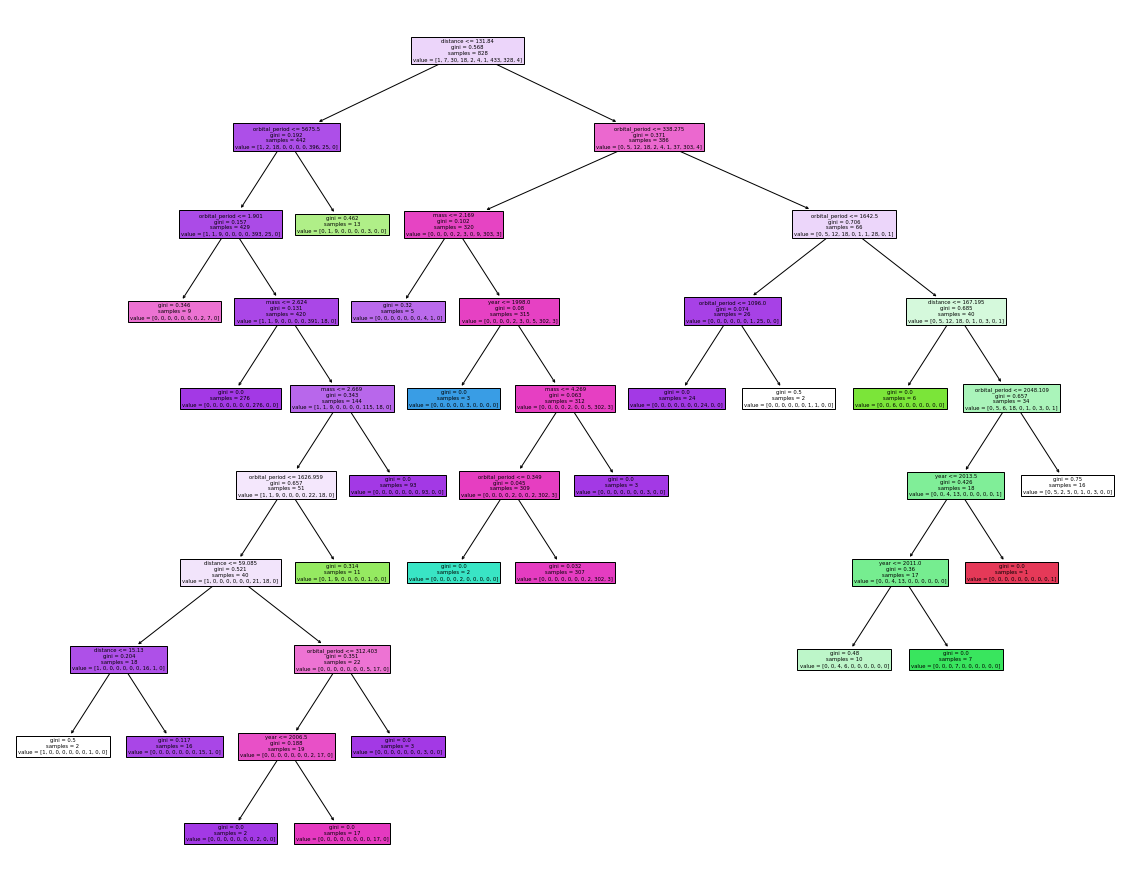

In [18]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
planets=sns.load_dataset('planets')

planets = planets.fillna(planets.mean())

data = planets[['number','orbital_period','mass','distance','year']].to_numpy()
target = planets['method'].to_numpy()

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state = 42)

from sklearn.tree import DecisionTreeClassifier

#기본적인 결정트리
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

#기본 결정트리 출력
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize = (20,12))
plot_tree(dt, filled = True, feature_names = ['number','orbital_period','mass','distance','year'])
plt.savefig('첫 번째 결정트리')
plt.show()

#랜럼서치를 이용한 결정트리
from scipy.stats import uniform, randint

params = {'min_impurity_decrease' : uniform(0.0001, 0.001),
          'max_depth' : randint(10,20),
          'min_samples_split' : randint(2,25),
          'min_samples_leaf' : randint(1,25)}

from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state = 42), params, 
                        n_iter = 100, n_jobs = -1, random_state = 42)
gs.fit(train_input, train_target)

print(gs.best_params_)

dt = gs.best_estimator_
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

#랜덤서치를 이용한 결정트리 출력
plt.figure(figsize = (20,16))
plot_tree(dt, filled = True, feature_names = ['number','orbital_period','mass','distance','year'])
plt.savefig('두 번째 결정트리')
plt.show()